<a href="https://colab.research.google.com/github/day28645/Applied-Data-Science/blob/main/week9_pca_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Dataset

https://github.com/codebasics/py/blob/master/ML/18_PCA/PCA_tutorial_digits.ipynb

https://www.youtube.com/watch?v=8klqIM9UvAc

## Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Import Dataset

In [ ]:
from sklearn.datasets import load_digits

dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

## Exploring Data

In [ ]:
dataset.data.shape

(1797, 64)

In [ ]:
def add_label(ax):
  for label in ax.containers:
    ax.bar_label(label)

<ipython-input-1419-dba7dafc26c5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  dg = sns.countplot(data = data.frame, x = "target", palette='mako')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

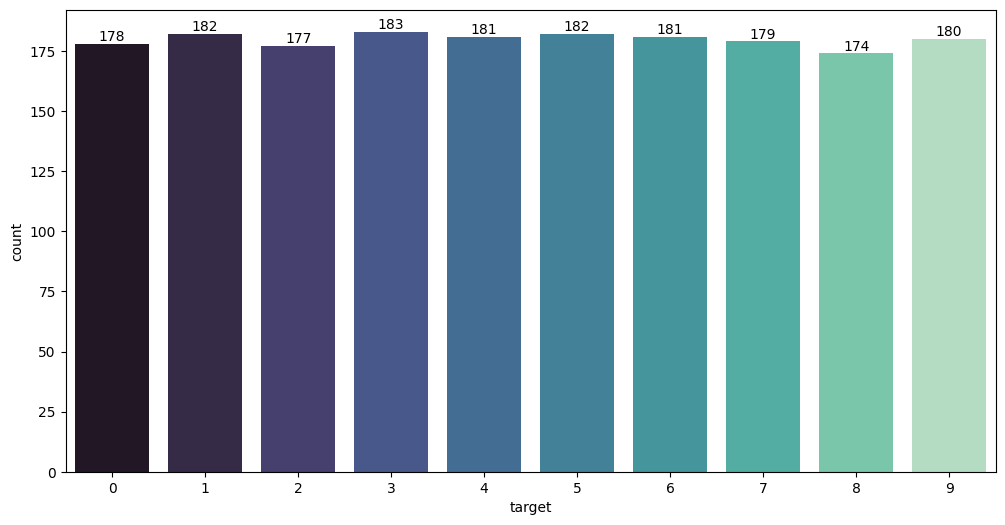

In [ ]:
data = load_digits(as_frame=True)

plt.figure(figsize=(12,6))
dg = sns.countplot(data = data.frame, x = "target", palette='mako')
add_label(dg)
plt.show()

In [ ]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

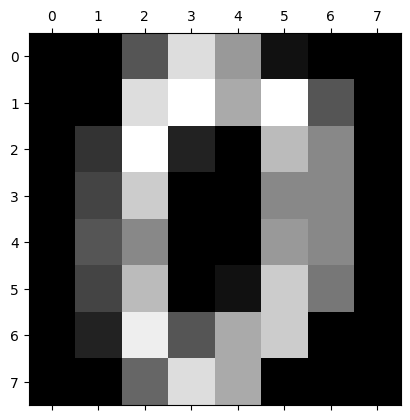

In [ ]:
%matplotlib inline
plt.gray()
plt.matshow(dataset.data[0].reshape(8,8));

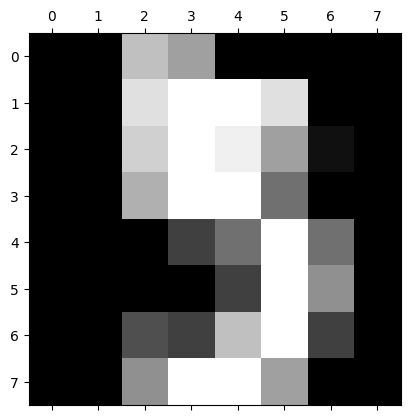

In [ ]:
plt.matshow(dataset.data[5].reshape(8,8))

In [ ]:
dataset.data[8].reshape(8,8)

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

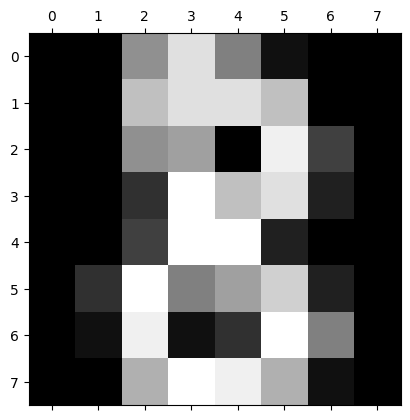

In [ ]:
plt.matshow(dataset.data[8].reshape(8,8))

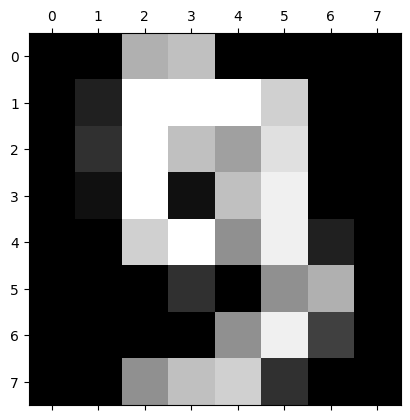

In [ ]:
plt.matshow(dataset.data[9].reshape(8,8))

In [ ]:
dataset.target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


## Data Manipulation

In [ ]:
X = df
y = dataset.target

In [ ]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

# PCA

## 1# No PCA

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

## 2# PCA : 1 parameter - variance 95%

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)  #95 percent of variance
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9547965245651595

In [ ]:
pca.n_components_

29

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

## 3# PCA : 1 parameter - n_components = 2

In [ ]:
pca = PCA(n_components=2) #define the number of components is equal two
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [ ]:
pca.explained_variance_ratio_.sum()

0.28509364823699285

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333

## 4# PCA : 2 parameters - n_components = 20 , svd_solver = arpack


In [ ]:
pca = PCA(n_components=20, svd_solver='arpack')
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 20)

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,  -0.89814969,
          0.70261087,   3.46211868],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   4.47844612,
         -1.95570261,   5.25570801],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   1.26984791,
          0.18477985,  -8.73107584],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,   2.48866041,
          0.9772913 ,  -2.4004185 ],
       [ -4.87210009, -12.42395362,  10.17086635, ...,  -0.60606484,
          6.55417732,   0.07616363],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -2.10176302,
          0.18925029,  -5.30100241]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617])

In [ ]:
pca.explained_variance_ratio_.sum()

0.894303116598526

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9666666666666667

## 5# PCA : 2 parameters - n_components = 50 , whiten = True

In [ ]:
pca = PCA(n_components=50, whiten=True)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 50)

In [ ]:
X_pca

array([[-0.09413512, -1.66272073,  0.79471413, ..., -0.73916682,
        -0.41458573,  0.06181929],
       [ 0.59476828,  1.6231603 , -0.37283291, ...,  0.352484  ,
         0.22915791,  0.05190141],
       [ 0.52259074,  0.77810179, -0.24846184, ...,  0.92015058,
         0.34053001, -0.12932687],
       ...,
       [ 0.80731022,  0.54397269, -0.47025462, ..., -0.39478362,
         0.54717256,  0.16738195],
       [-0.36415081, -0.97098371,  0.85415667, ..., -0.67263442,
         0.93037776,  0.57825287],
       [-0.02574039, -0.49749417, -0.90478379, ...,  1.11803678,
        -1.58807383, -0.50365697]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 , 0.00428888,
       0.00373606, 0.00353274, 0.00336684, 0.0032803 , 0.00308321,
       0.00293779, 0.00256589, 0.00227742, 0.00222278, 0.0021143 ,
       0.00189909, 0.00158653, 0.0015116 , 0.00140579, 0.00116622,
       0.00107493, 0.00096405, 0.00077463, 0.00055721, 0.00040433])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9995471140234796

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9638888888888889

# Iris Dataset

## Import Dataset

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

## Exploring Data

In [ ]:
df.shape

(150, 5)

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.sample(10)

,sepal length,sepal width,petal length,petal width,target
2,4.7,3.2,1.3,0.2,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica
14,5.8,4.0,1.2,0.2,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor
148,6.2,3.4,5.4,2.3,Iris-virginica


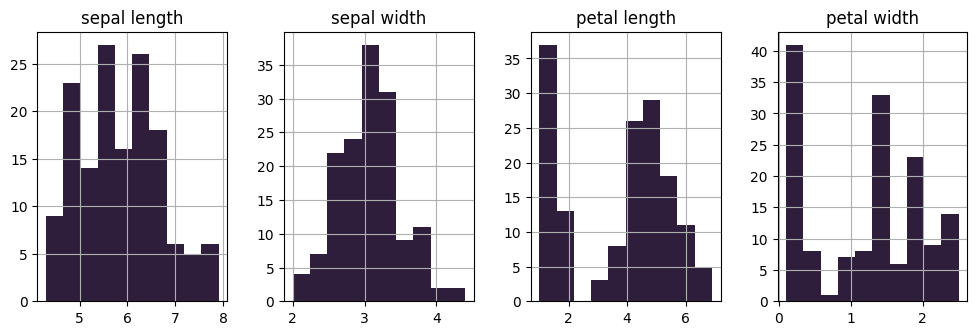

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
df.hist(layout=(1, len(features)), figsize=(3 * len(features), 3.5));

In [ ]:
numeric_data = df.select_dtypes(include=[np.number])
corr = numeric_data.corr()

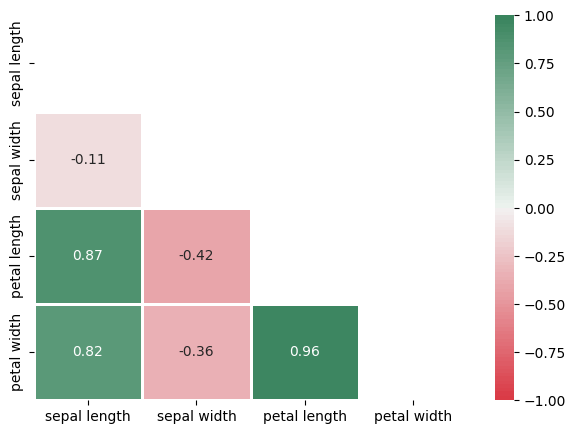

In [ ]:
dcorr = df[features].corr()

mask = np.zeros_like(dcorr)
#mask shape
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(dcorr, cmap=sns.diverging_palette(10, 145, n=100),
            vmin=-1, vmax=1, center=0, linewidths=1, annot=True, mask=mask, ax=ax);

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

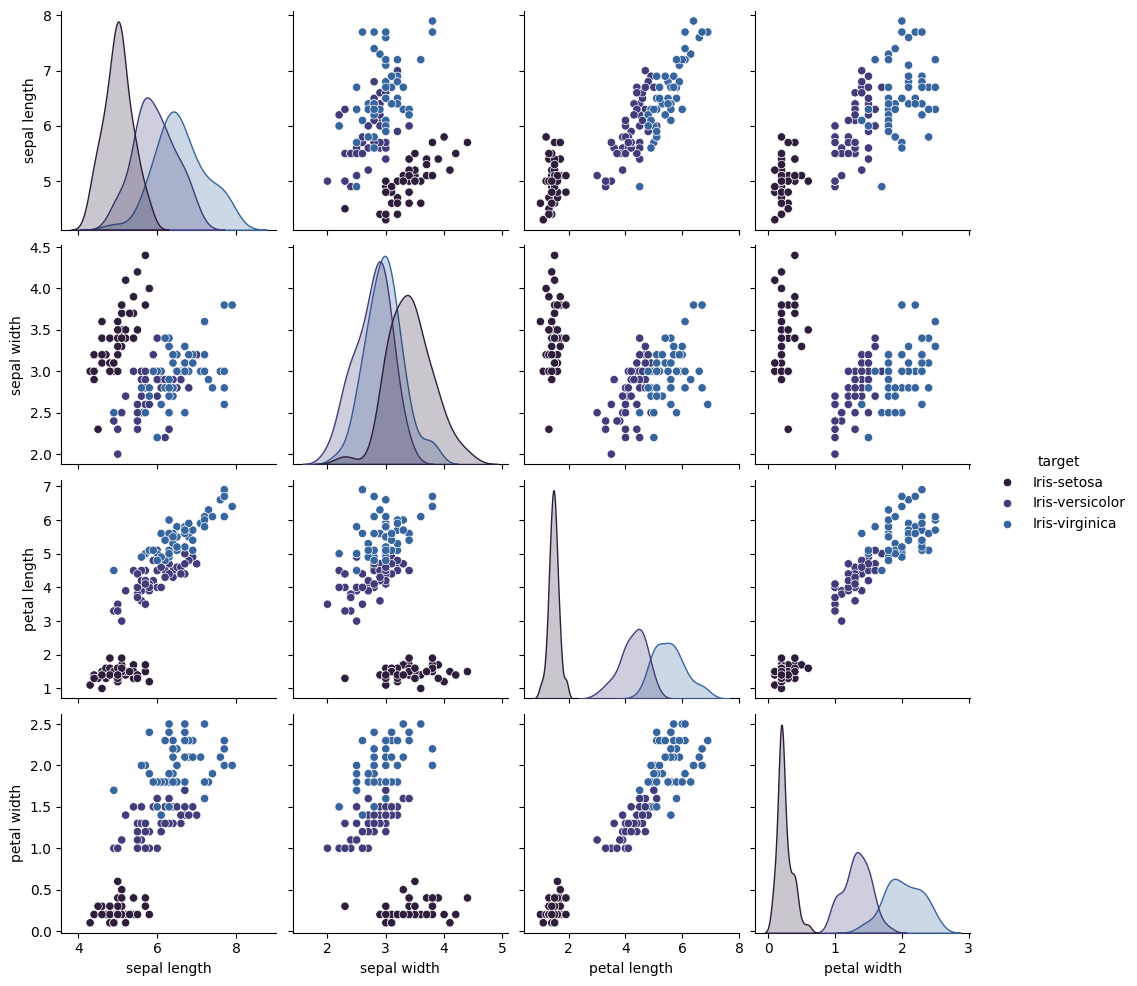

In [ ]:
sns.pairplot(df, vars=features, hue='target');

## Data Manipulation

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x_scaled = StandardScaler().fit_transform(x)

In [ ]:
x_df = pd.DataFrame(x_scaled)
x_df.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


# PCA

## 1# No PCA

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y[:, 0], test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9333333333333333

## 2# PCA : 1 parameter - variance 95%

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)  #95 percent of variance
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [ ]:
pca.n_components_

29

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9547965245651595

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y[:, 0], test_size=0.2, random_state=30)

model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9333333333333333

## 3# PCA : 1parameter - n_components = 2

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [ ]:
pca.n_components_

2

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9580097536148199

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]])

In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y[:, 0], test_size=0.2, random_state=30)

model = LogisticRegression()
model.fit(x_train_pca, y_train)
model.score(x_test_pca, y_test)

0.9333333333333333

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

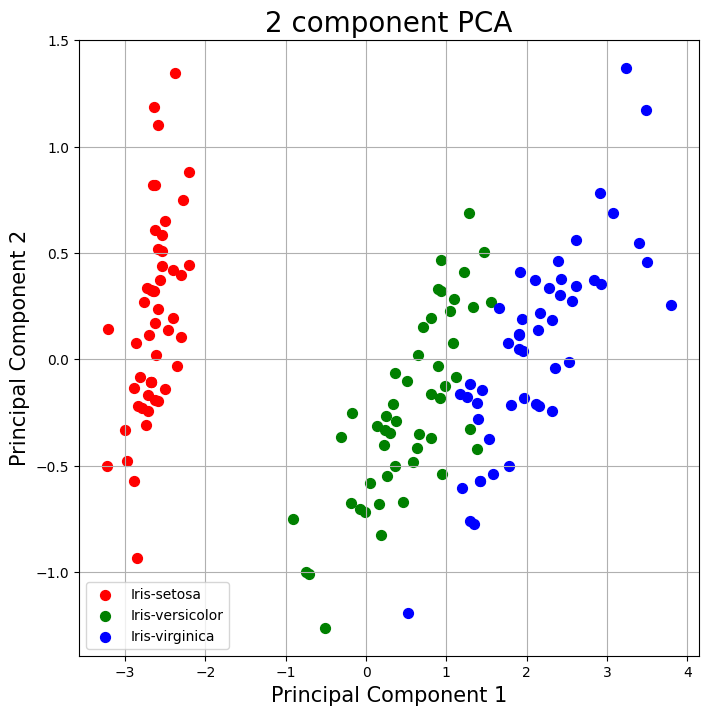

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 4# PCA : 2 parameters - n_components = 20 , copy = False

In [ ]:
pca = PCA(n_components=20, copy=False)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 20)

In [ ]:
pca.n_components_

20

In [ ]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,  -0.89814969,
          0.70261087,   3.46211868],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   4.47844612,
         -1.95570261,   5.25570801],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   1.26984791,
          0.18477985,  -8.73107584],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,   2.48866041,
          0.9772913 ,  -2.4004185 ],
       [ -4.87210009, -12.42395362,  10.17086635, ...,  -0.60606484,
          6.55417732,   0.07616363],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -2.10176302,
          0.18925029,  -5.30100241]])

In [ ]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617])

In [ ]:
pca.explained_variance_ratio_.sum()

0.8943031165985262

In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y[:, 0], test_size=0.2, random_state=30)

model = LogisticRegression()
model.fit(x_train_pca, y_train)
model.score(x_test_pca, y_test)

0.9333333333333333

## 5# PCA : 2 parameters - n_components = 64 , svd_solver = full

In [ ]:
pca = PCA(n_components=64, svd_solver='full')
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 64)

In [ ]:
pca.n_components_

64

In [ ]:
X_pca

array([[-1.25946645e+00, -2.12748835e+01,  9.46305462e+00, ...,
         0.00000000e+00,  0.00000000e+00,  4.46141155e-14],
       [ 7.95761130e+00,  2.07686990e+01, -4.43950604e+00, ...,
         1.92498685e-15, -6.05622106e-16,  1.67046393e-16],
       [ 6.99192297e+00,  9.95598641e+00, -2.95855808e+00, ...,
         1.02735571e-15, -1.66720502e-16,  1.16654252e-16],
       ...,
       [ 1.08012837e+01,  6.96025223e+00, -5.59955453e+00, ...,
        -1.30837690e-16,  2.56097260e-16,  9.70809841e-17],
       [-4.87210009e+00, -1.24239536e+01,  1.01708664e+01, ...,
         5.97403958e-17,  9.87489376e-17, -1.23762878e-16],
       [-3.44389631e-01, -6.36554919e+00, -1.07737085e+01, ...,
        -1.50603919e-16, -1.30972711e-17,  2.70670966e-16]])

In [ ]:
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [ ]:
pca.explained_variance_ratio_.sum()

0.9999999999999998

In [ ]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y[:, 0], test_size=0.2, random_state=30)

model = LogisticRegression()
model.fit(x_train_pca, y_train)
model.score(x_test_pca, y_test)

0.9333333333333333